# 2.2e Weather CNN on Scaled Data

## Contents
### 1. Import libraries and data
### 2. Reshape data sets
### 3. Split data
### 4. Create first Keras layered model (scenario 1)
### 5. Change hyperparameters (final scenario)

## 1. Import libraries and data

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D
from keras.layers import Dense, Dropout
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# from keras.utils import np_utils

In [4]:
path = r'/Users/susanwang/Documents/CF_ML/ML_Project'

In [5]:
weather_df = pd.read_csv(os.path.join(path, 'Data Sets', 'scaled_cleaned_weather.csv'), index_col=False)

In [6]:
weather_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,0.660514,0.826097,-0.001949,-1.101066,-0.265148,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,...,-1.299744,-0.806427,-0.088407,0.372147,-0.668215,-0.519743,-0.752237,1.205492,0.095234,1.544023
1,0.244897,0.735760,-0.001949,-1.058108,1.658760,-0.810126,-0.582946,-0.462450,-0.569988,0.652846,...,-1.262455,-1.042055,0.503361,-0.829285,-0.548046,-0.629054,-0.407141,0.371461,0.067319,-0.712374
2,1.076130,1.277781,-0.001949,-1.251420,0.155707,-1.065304,-0.257010,-0.186545,-0.592896,0.652846,...,-0.432779,-1.136306,-0.396127,-1.009500,-0.067372,0.054135,-0.177078,1.205492,0.132454,-0.273630
3,-1.001953,1.458455,-0.001949,-0.821838,-0.445514,-0.114186,-0.555784,-0.385810,-0.512718,1.396557,...,0.387574,-1.183432,0.669056,-1.039536,-0.998679,-0.164486,-0.838511,0.371461,0.418586,1.544023
4,0.244897,1.729466,-0.001949,-0.746661,-0.164944,0.187388,-1.003946,-1.075573,-1.039603,1.396557,...,1.729970,-0.794645,-0.490810,0.672505,-1.509396,-1.339569,-1.471186,0.788477,0.388345,1.418668


In [7]:
weather_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,0.660514,0.826097,-0.001949,-1.101066,-0.265148,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,...,-1.299744,-0.806427,-0.088407,0.372147,-0.668215,-0.519743,-0.752237,1.205492,0.095234,1.544023
1,0.244897,0.735760,-0.001949,-1.058108,1.658760,-0.810126,-0.582946,-0.462450,-0.569988,0.652846,...,-1.262455,-1.042055,0.503361,-0.829285,-0.548046,-0.629054,-0.407141,0.371461,0.067319,-0.712374
2,1.076130,1.277781,-0.001949,-1.251420,0.155707,-1.065304,-0.257010,-0.186545,-0.592896,0.652846,...,-0.432779,-1.136306,-0.396127,-1.009500,-0.067372,0.054135,-0.177078,1.205492,0.132454,-0.273630
3,-1.001953,1.458455,-0.001949,-0.821838,-0.445514,-0.114186,-0.555784,-0.385810,-0.512718,1.396557,...,0.387574,-1.183432,0.669056,-1.039536,-0.998679,-0.164486,-0.838511,0.371461,0.418586,1.544023
4,0.244897,1.729466,-0.001949,-0.746661,-0.164944,0.187388,-1.003946,-1.075573,-1.039603,1.396557,...,1.729970,-0.794645,-0.490810,0.672505,-1.509396,-1.339569,-1.471186,0.788477,0.388345,1.418668


In [8]:
answers_df = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)

In [9]:
answers_df.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# remove date column
answers_df.drop(columns=['DATE'], inplace=True)

In [11]:
answers_df.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
answers_df.shape

(22950, 15)

## 2. Reshape data sets

In [13]:
stations = list()

columns = weather_df.columns.tolist()
for col in columns:
    name = col.split('_', 1)[0]
    if name not in stations:
        stations.append(name)

print(len(stations))
print(stations)

15
['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [14]:
observations = list()

for col in columns:
    name = col.split('_', 1)[1]
    if name not in observations:
        observations.append(name)

print(len(observations))
print(observations)

9
['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


In [15]:
weather_arr = np.array(weather_df)
weather_arr

array([[ 6.60513663e-01,  8.26096599e-01, -1.94863388e-03, ...,
         1.20549184e+00,  9.52340493e-02,  1.54402321e+00],
       [ 2.44896945e-01,  7.35759689e-01, -1.94863388e-03, ...,
         3.71461490e-01,  6.73187494e-02, -7.12373579e-01],
       [ 1.07613038e+00,  1.27778115e+00, -1.94863388e-03, ...,
         1.20549184e+00,  1.32454449e-01, -2.73629759e-01],
       ...,
       [-5.86336492e-01,  1.30644098e-02,  7.16401992e-01, ...,
        -8.79584032e-01, -1.43225559e-04,  7.29213258e-01],
       [-1.70719774e-01,  3.74412049e-01,  4.87141154e-01, ...,
        -8.79584032e-01, -1.43225559e-04,  1.29331245e+00],
       [-1.70719774e-01,  7.35759689e-01,  1.96744092e-01, ...,
        -8.79584032e-01, -1.43225559e-04,  1.48134552e+00]])

In [16]:
weather_arr.shape

(22950, 135)

In [17]:
X = weather_arr.reshape(-1, 15, 9)
X

array([[[ 6.60513663e-01,  8.26096599e-01, -1.94863388e-03, ...,
         -5.28623012e-01, -8.45651922e-01, -4.78356271e-01],
        [-1.20643263e+00,  9.05270489e-01,  3.21770762e-01, ...,
         -1.01687613e+00, -1.22021042e+00, -9.49202784e-01],
        [-2.55240242e-01, -1.00976762e-02, -5.87602906e-03, ...,
         -1.09916317e+00, -1.11943125e+00, -1.13683915e+00],
        ...,
        [ 9.52340493e-02, -1.24444008e+00, -6.49855996e-01, ...,
         -6.33220094e-02, -6.01023076e-02, -3.46465175e-03],
        [-1.07912619e+00,  4.79130672e-01, -1.01329461e+00, ...,
         -4.43700743e-01,  7.61754381e-01, -1.29974368e+00],
        [-8.06426690e-01, -8.84074022e-02,  3.72146925e-01, ...,
          1.20549184e+00,  9.52340493e-02,  1.54402321e+00]],

       [[ 2.44896945e-01,  7.35759689e-01, -1.94863388e-03, ...,
         -5.82945633e-01, -4.62450189e-01, -5.69988328e-01],
        [ 6.52845676e-01,  1.11911758e+00,  1.68378867e-02, ...,
         -1.10766931e+00, -8.18701592e

In [19]:
X.shape

(22950, 15, 9)

In [20]:
y = np.array(answers_df)
y.shape

(22950, 15)

## 3. Split data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15, 9)
(5738, 15, 9)
(17212, 15)
(5738, 15)


## 4. Create first Keras layered model - Scenario 1

In [25]:
len(X_train[0])

15

In [26]:
len(X_train[0][0])

9

In [40]:
epochs = 30
batch_size = 16
n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential()
model.add(Conv1D(n_hidden, kernel_size=2, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(16, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) #sigmoid

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/30
1076/1076 - 3s - 3ms/step - accuracy: 0.1569 - loss: 1579.0312
Epoch 2/30
1076/1076 - 2s - 2ms/step - accuracy: 0.1390 - loss: 12794.1523
Epoch 3/30
1076/1076 - 2s - 2ms/step - accuracy: 0.1236 - loss: 39305.0859
Epoch 4/30
1076/1076 - 2s - 2ms/step - accuracy: 0.1213 - loss: 81924.6719
Epoch 5/30
1076/1076 - 2s - 2ms/step - accuracy: 0.1189 - loss: 143478.9219
Epoch 6/30
1076/1076 - 1s - 1ms/step - accuracy: 0.1179 - loss: 221273.5000
Epoch 7/30
1076/1076 - 1s - 1ms/step - accuracy: 0.1178 - loss: 319409.8750
Epoch 8/30
1076/1076 - 1s - 1ms/step - accuracy: 0.1238 - loss: 448513.0000
Epoch 9/30
1076/1076 - 1s - 1ms/step - accuracy: 0.1224 - loss: 596978.6875
Epoch 10/30
1076/1076 - 1s - 1ms/step - accuracy: 0.1283 - loss: 780866.6250
Epoch 11/30
1076/1076 - 1s - 1ms/step - accuracy: 0.1228 - loss: 990901.6250
Epoch 12/30
1076/1076 - 1s - 1ms/step - accuracy: 0.1240 - loss: 1234273.5000
Epoch 13/30
1076/1076 - 1s - 1ms/step - accuracy: 0.1250 - loss: 1508976.0000
Epoch 14/30

### Confusion Matrix - scenario 1

In [43]:
locations = list({x.split("_")[0] for x in weather_df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [44]:
# define y_pred
y_pred = pd.DataFrame(model.predict(X_test))
y_pred = y_pred.astype('int32')
y_pred

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5735,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5736,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0
5734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5735,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0
5736,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


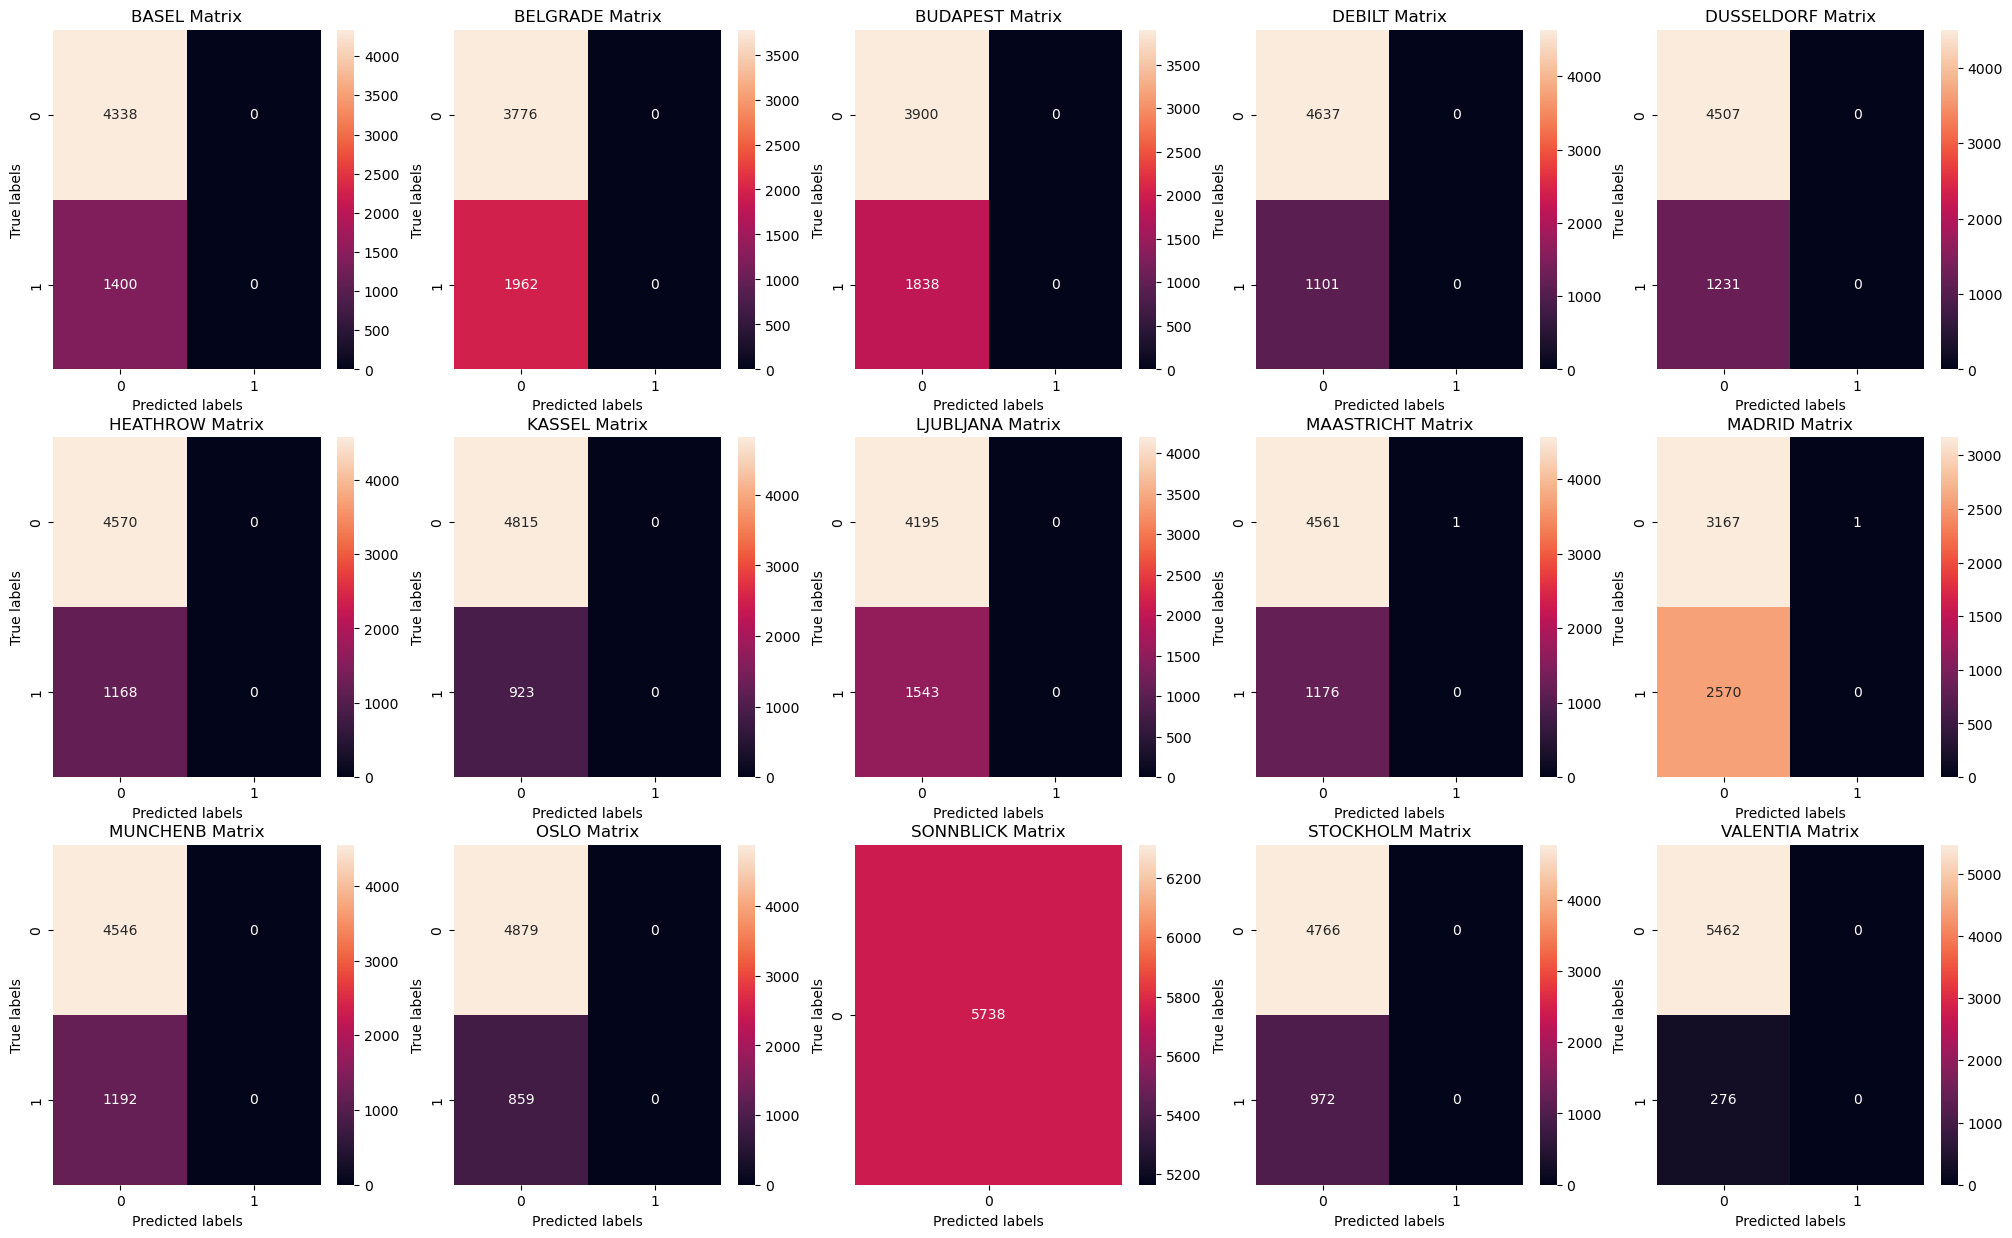

In [46]:
# key = "_pleasant_weather"
# stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
# labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        # cm = confusion_matrix(y_test_df.loc[:,name+key], y_pred[:,count])
        cm = confusion_matrix(y_test_df.loc[:, count], y_pred.loc[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## 5. Changing hyperparameters

### Use below cells to experiment with hyperparameters until arriving at optimal results

In [68]:
epochs = 20
batch_size =32
n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential()
model.add(Conv1D(n_hidden, kernel_size=2, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(16, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='relu')) #sigmoid

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/20
538/538 - 2s - 4ms/step - accuracy: 0.1077 - loss: 10.6010
Epoch 2/20
538/538 - 1s - 2ms/step - accuracy: 0.1254 - loss: 8.1202
Epoch 3/20
538/538 - 1s - 2ms/step - accuracy: 0.1529 - loss: 7.9893
Epoch 4/20
538/538 - 1s - 2ms/step - accuracy: 0.1660 - loss: 7.8975
Epoch 5/20
538/538 - 1s - 2ms/step - accuracy: 0.1697 - loss: 7.7998
Epoch 6/20
538/538 - 1s - 2ms/step - accuracy: 0.1658 - loss: 7.8009
Epoch 7/20
538/538 - 1s - 2ms/step - accuracy: 0.1700 - loss: 7.7361
Epoch 8/20
538/538 - 1s - 2ms/step - accuracy: 0.1838 - loss: 7.6745
Epoch 9/20
538/538 - 1s - 2ms/step - accuracy: 0.1764 - loss: nan
Epoch 10/20
538/538 - 1s - 2ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/20
538/538 - 1s - 2ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/20
538/538 - 1s - 2ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/20
538/538 - 1s - 2ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/20
538/538 - 1s - 2ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/20
538/538 - 1s - 2ms/step - accuracy

### Confusion Matrix - Final Scenario

In [73]:
# define y_pred
y_pred = pd.DataFrame(model.predict(X_test))
# y_pred = y_pred.astype('int32')
y_pred

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# show error
y_pred.astype('int32')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [72]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0
5734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5735,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0
5736,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
# key = "_pleasant_weather"
# stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
# labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        # cm = confusion_matrix(y_test_df.loc[:,name+key], y_pred[:,count])
        cm = confusion_matrix(y_test_df.loc[:, count], y_pred.loc[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1